In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load all 9 datasets
customers = pd.read_csv('../data/olist_customers_dataset.csv')
orders = pd.read_csv('../data/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
products = pd.read_csv('../data/olist_products_dataset.csv')
sellers = pd.read_csv('../data/olist_sellers_dataset.csv')
geolocation = pd.read_csv('../data/olist_geolocation_dataset.csv')
order_payments = pd.read_csv('../data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')
category_translation = pd.read_csv('../data/product_category_name_translation.csv')

# Exploring the 'orders' DataFrame

In [7]:
# View the first 5 rows
print("First 5 rows of orders data:")
print(orders.head())

First 5 rows of orders data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-

In [8]:
# Get a summary of data types and non-null values
print("\nOrders DataFrame Info:")
orders.info()


Orders DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Check for missing values
print("\nMissing values in orders data:")
print(orders.isnull().sum())


Missing values in orders data:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [10]:
# Get summary statistics for numerical columns
print("\nDescriptive statistics for orders data:")
print(orders.describe())


Descriptive statistics for orders data:
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-08-02 12:05:26  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top            

In [11]:
# Find the number of unique values in each column
print("\nUnique value counts in orders data:")
print(orders.nunique())


Unique value counts in orders data:
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


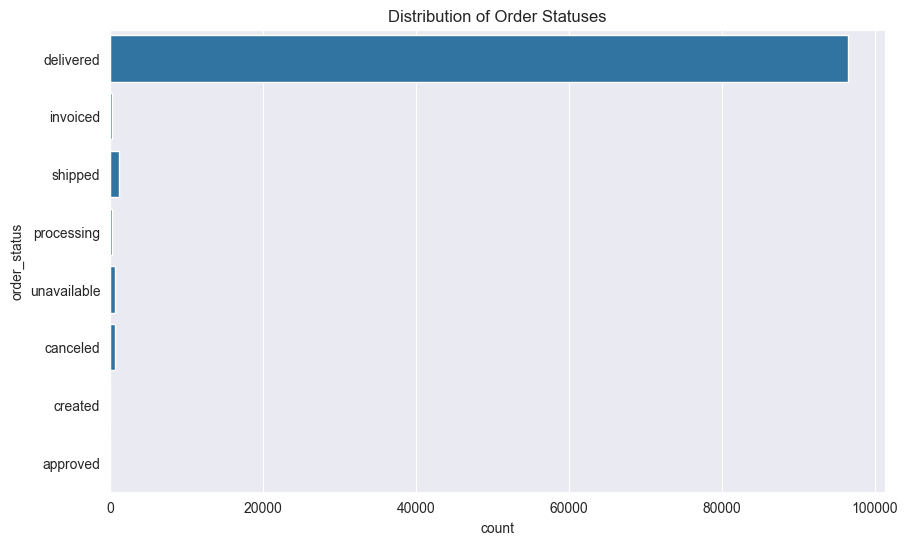

In [12]:
# What is the distribution of order statuses?
plt.figure(figsize=(10, 6))
sns.countplot(y=orders['order_status'])
plt.title('Distribution of Order Statuses')
plt.show()

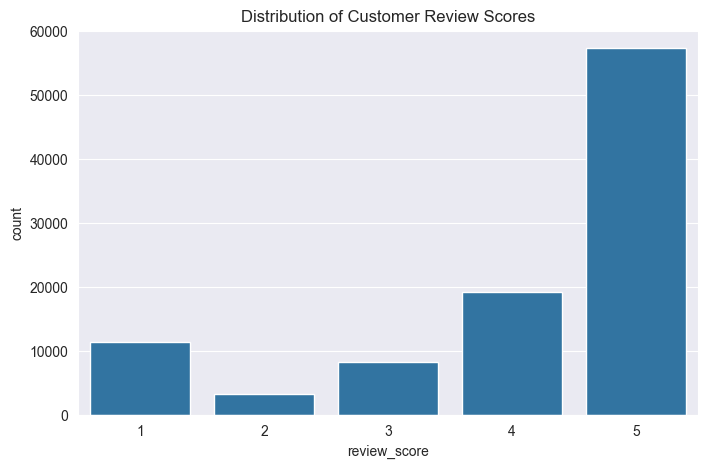

In [13]:
# What is the distribution of customer review scores?
plt.figure(figsize=(8, 5))
sns.countplot(x=order_reviews['review_score'])
plt.title('Distribution of Customer Review Scores')
plt.show()

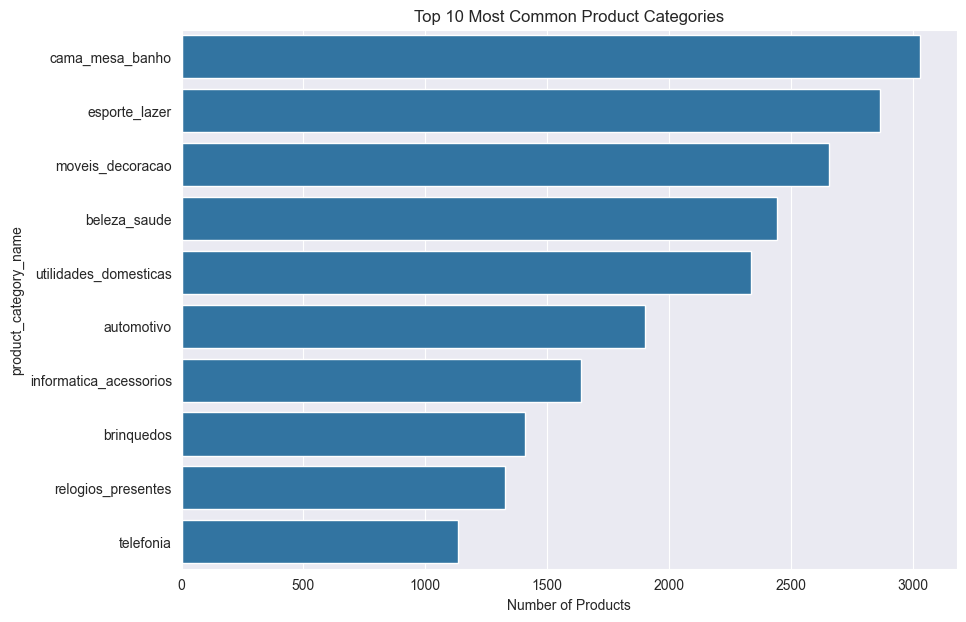

In [14]:
# Which product categories are most common?
top_categories = products['product_category_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 7))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Most Common Product Categories')
plt.xlabel('Number of Products')
plt.show()

# What are the highest revenue-generating product categories?

In [15]:
# Merge items, products, and translations
merged_df = pd.merge(order_items, products, on='product_id')
merged_df = pd.merge(merged_df, category_translation, on='product_category_name')

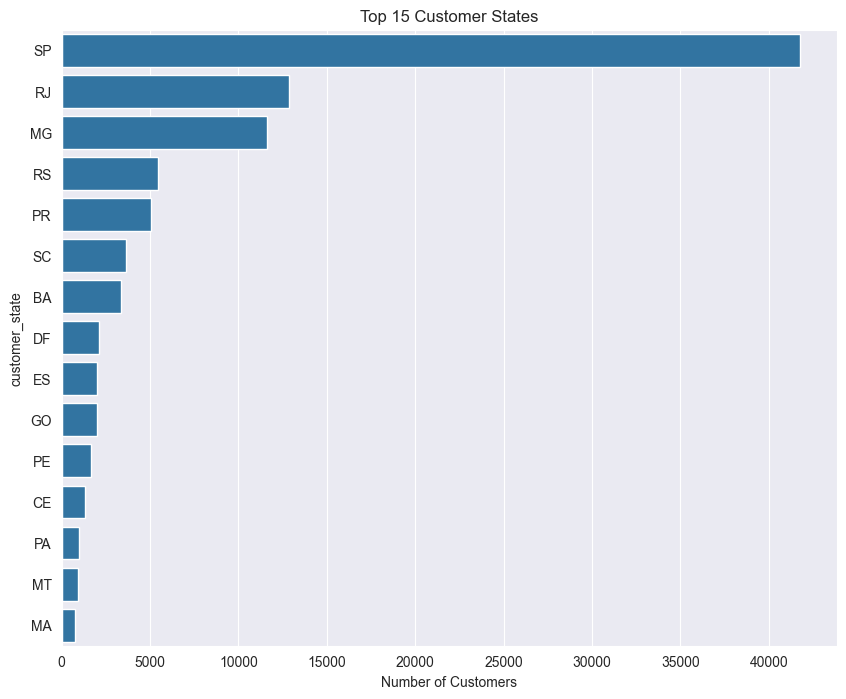

In [16]:
# Where are most of our customers located?
top_states = customers['customer_state'].value_counts().nlargest(15)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 15 Customer States')
plt.xlabel('Number of Customers')
plt.show()

In [17]:
# Group by English category name and sum the price
category_revenue = merged_df.groupby('product_category_name_english')['price'].sum().nlargest(10)

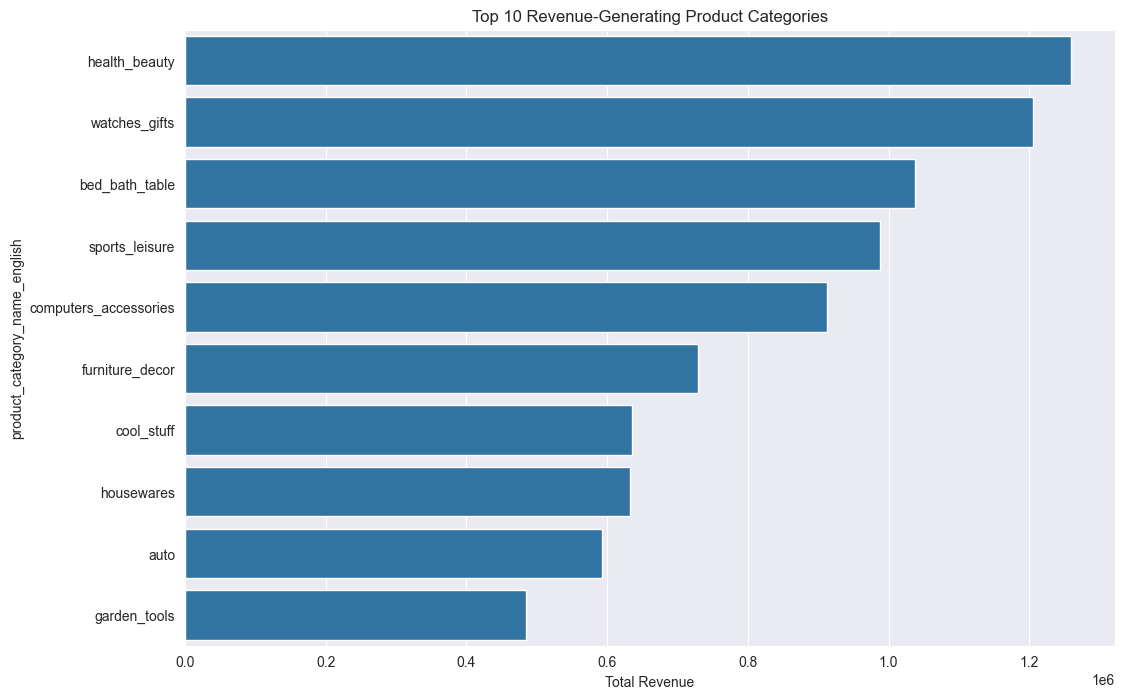

In [18]:
# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Top 10 Revenue-Generating Product Categories')
plt.xlabel('Total Revenue')
plt.show()

# Does late delivery impact review scores?

In [19]:
# Merge orders and reviews
delivery_reviews = pd.merge(orders, order_reviews, on='order_id')

In [20]:
# Convert date columns to datetime objects
delivery_reviews['order_delivered_customer_date'] = pd.to_datetime(delivery_reviews['order_delivered_customer_date'])
delivery_reviews['order_estimated_delivery_date'] = pd.to_datetime(delivery_reviews['order_estimated_delivery_date'])

In [21]:
# Calculate delivery delay in days
delivery_reviews['delivery_delay'] = (delivery_reviews['order_delivered_customer_date'] - delivery_reviews['order_estimated_delivery_date']).dt.days

In [22]:
# Create a 'timeliness' category
delivery_reviews['delivery_timeliness'] = 'On-Time or Early'
delivery_reviews.loc[delivery_reviews['delivery_delay'] > 0, 'delivery_timeliness'] = 'Delayed'

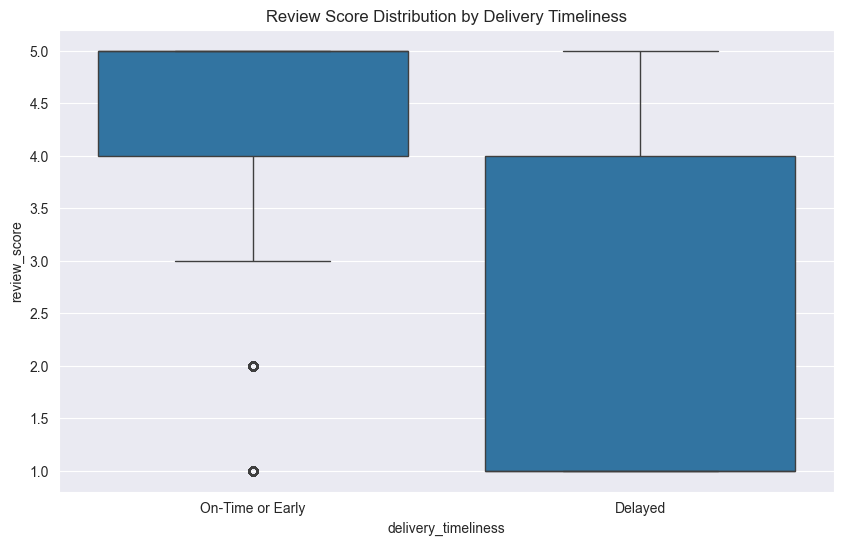

In [23]:
# Visualize the relationship with a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='delivery_timeliness', y='review_score', data=delivery_reviews)
plt.title('Review Score Distribution by Delivery Timeliness')
plt.show()